# Reliance Stock Market Analysis & Trend Prediction

## 1) Install & Import Libraries

In [2]:
!pip install -q yfinance seaborn

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid') # Corrected: Use sns.set_style for seaborn styles
%matplotlib inline

## 2) Download Reliance Data & Fix Columns

In [8]:
# Download data
df = yf.download("RELIANCE.NS", start="2010-01-01", end="2025-12-12")

# Explicitly set column names assuming default order for auto_adjust=True
# The default columns for yfinance with auto_adjust=True are 'Open', 'High', 'Low', 'Close', 'Volume'
df.columns = ["Open", "High", "Low", "Close", "Volume"]

# Quick look
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
df.head()

/tmp/ipython-input-2335280406.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2010-01-01", end="2025-12-12")
[*********************100%***********************]  1 of 1 completed

Columns: ['Open', 'High', 'Low', 'Close', 'Volume']
Shape: (3937, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,218.593079,221.763750,207.688843,221.763750,76646086
2010-01-05,217.617493,233.714740,216.540283,233.714740,21392825
2010-01-06,221.133713,222.454827,217.607354,219.487397,23691760
2010-01-07,224.802322,226.621393,219.101219,221.133708,26197920
2010-01-08,224.212936,226.377533,222.759715,225.198688,15110149


## 3) Basic EDA: Structure & Summary

In [9]:
# Basic info
print('DataFrame shape:', df.shape)
display(df.head())
display(df.tail())

print('\n--- Info ---')
display(df.info())

print('\n--- Describe (Close) ---')
display(df['Close'].describe())

print('\nMissing values per column:')
display(df.isnull().sum())

DataFrame shape: (3937, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,218.593079,221.763750,207.688843,221.763750,76646086
2010-01-05,217.617493,233.714740,216.540283,233.714740,21392825
2010-01-06,221.133713,222.454827,217.607354,219.487397,23691760
2010-01-07,224.802322,226.621393,219.101219,221.133708,26197920
2010-01-08,224.212936,226.377533,222.759715,225.198688,15110149


,Open,High,Low,Close,Volume
Date,,,,,
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266
2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491
2025-12-09,1529.400024,1542.500000,1520.099976,1540.300049,11503971
2025-12-10,1536.900024,1547.500000,1531.400024,1534.000000,7991629
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4705759



--- Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3937 entries, 2010-01-04 to 2025-12-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3937 non-null   float64
 1   High    3937 non-null   float64
 2   Low     3937 non-null   float64
 3   Close   3937 non-null   float64
 4   Volume  3937 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 184.5 KB


None


--- Describe (Close) ---


,Close
count,3937.000000
mean,599.734167
std,459.790440
min,139.482923
25%,201.918916
50%,405.575331
75%,1079.743546
max,1592.662006



Missing values per column:


,0
Open,0
High,0
Low,0
Close,0
Volume,0


### 3.1 Closing Price Trend

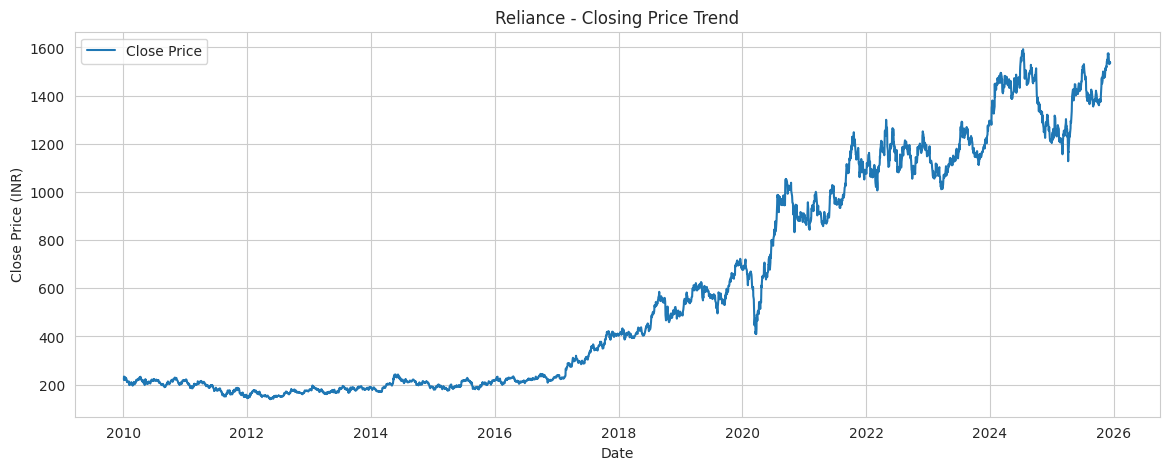

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Reliance - Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()

### 3.2 Open/High/Low/Close Comparison (line chart)

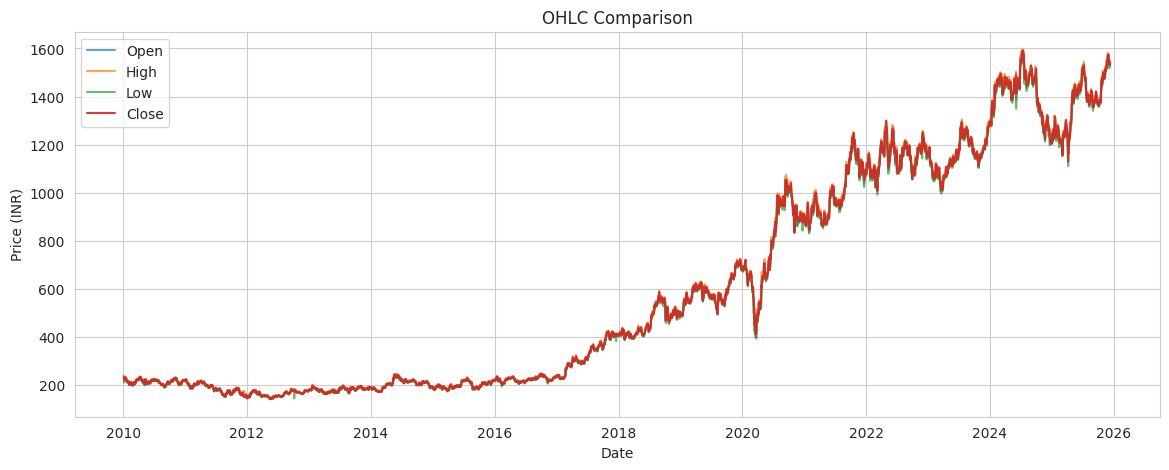

In [11]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Open'], label='Open', alpha=0.7)
plt.plot(df.index, df['High'], label='High', alpha=0.7)
plt.plot(df.index, df['Low'], label='Low', alpha=0.7)
plt.plot(df.index, df['Close'], label='Close', alpha=0.9)
plt.title('OHLC Comparison')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

### 3.3 Volume Trend

/tmp/ipython-input-3167939789.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['Volume'].resample('M').mean()


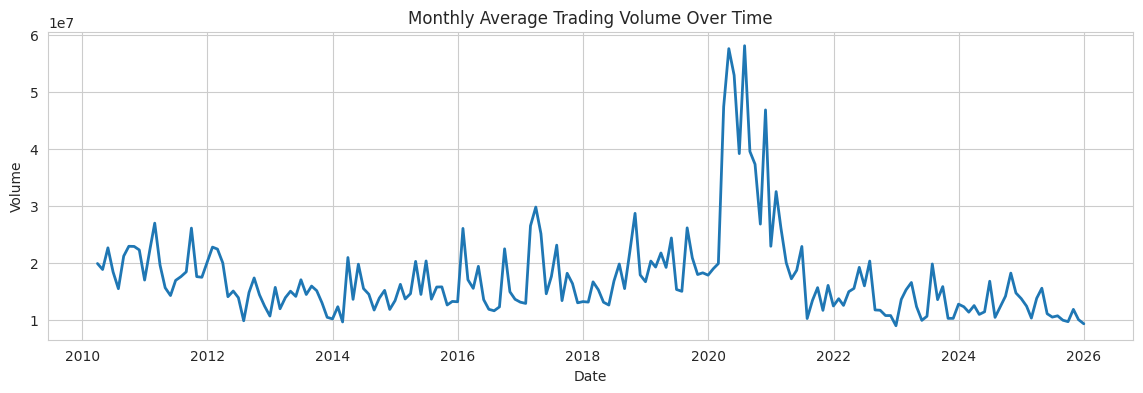

In [21]:
monthly_volume = df['Volume'].resample('M').mean()

plt.figure(figsize=(14,4))
plt.plot(monthly_volume.index, monthly_volume, linewidth=2)
plt.title("Monthly Average Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### 3.4 Moving Averages (MA20 & MA50)

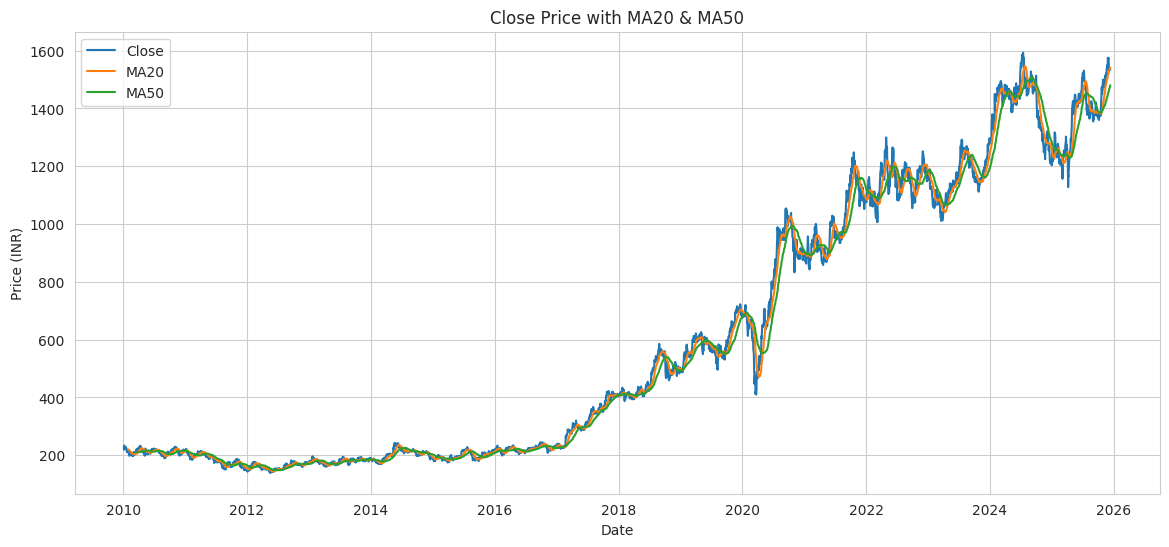

In [13]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MA20'], label='MA20')
plt.plot(df.index, df['MA50'], label='MA50')
plt.title('Close Price with MA20 & MA50')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

### 3.5 Daily Returns & Volatility

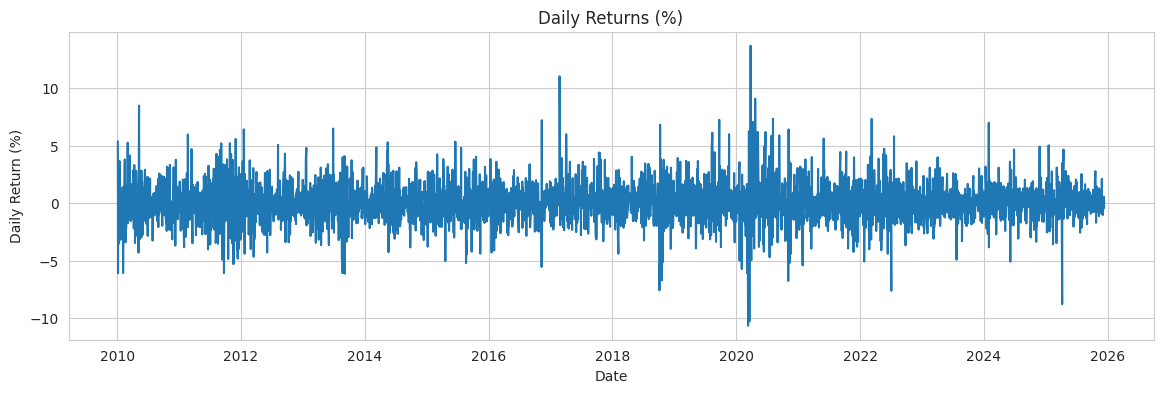

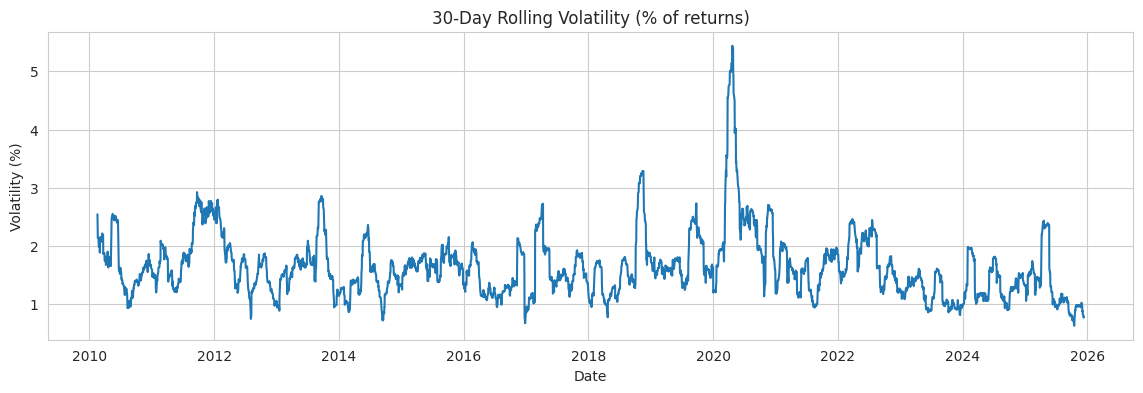

In [14]:
df['Daily_Returns'] = df['Close'].pct_change()*100  # percent
plt.figure(figsize=(14,4))
plt.plot(df.index, df['Daily_Returns'])
plt.title('Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

# Rolling volatility (30-day std of returns)
df['Rolling_Vol_30'] = df['Daily_Returns'].rolling(window=30).std()
plt.figure(figsize=(14,4))
plt.plot(df.index, df['Rolling_Vol_30'])
plt.title('30-Day Rolling Volatility (% of returns)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.show()

### 3.6 Distribution & Boxplot of Closing Price

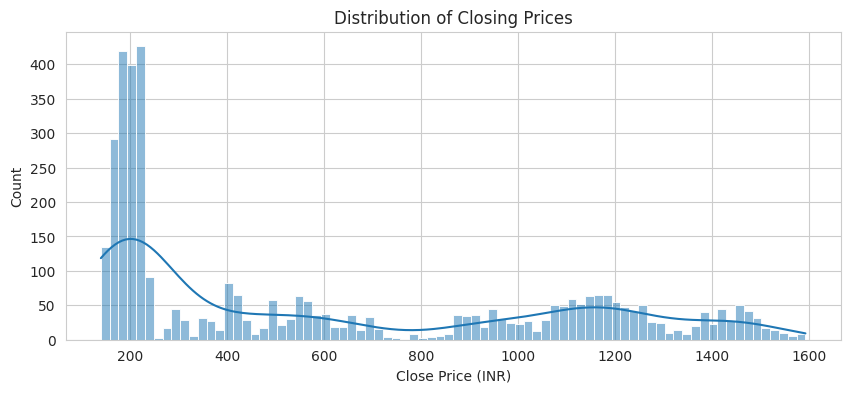

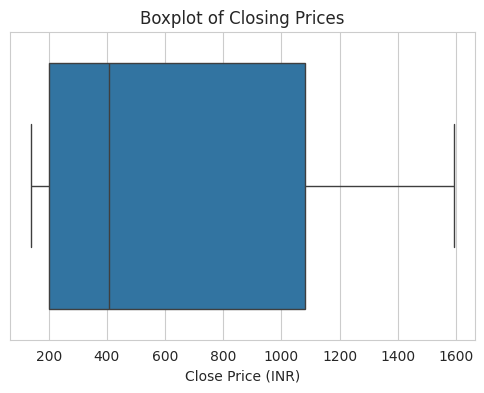

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(df['Close'].dropna(), bins=80, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price (INR)')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Close'].dropna())
plt.title('Boxplot of Closing Prices')
plt.xlabel('Close Price (INR)')
plt.show()

### 3.7 Correlation Heatmap

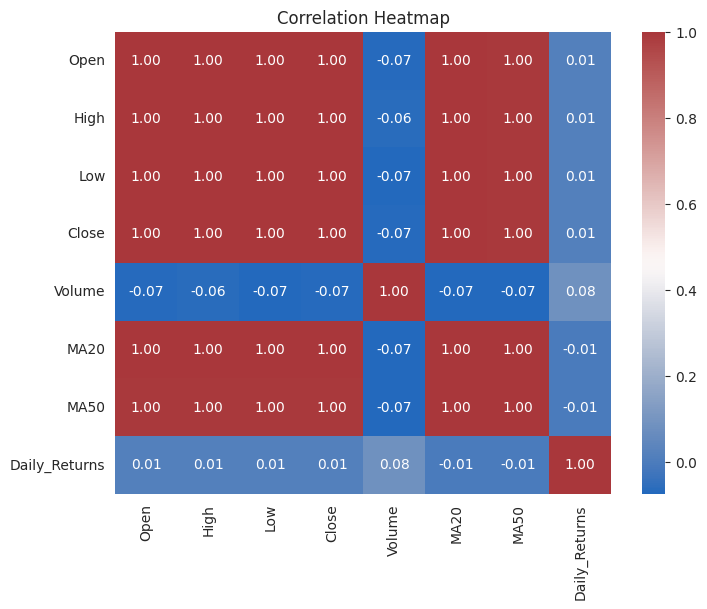

In [16]:
plt.figure(figsize=(8,6))
corr = df[['Open','High','Low','Close','Volume','MA20','MA50','Daily_Returns']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

### 3.8 Monthly & Yearly Summary (mean close)

/tmp/ipython-input-1938318719.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Close'].resample('M').mean()
/tmp/ipython-input-1938318719.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df['Close'].resample('Y').mean()


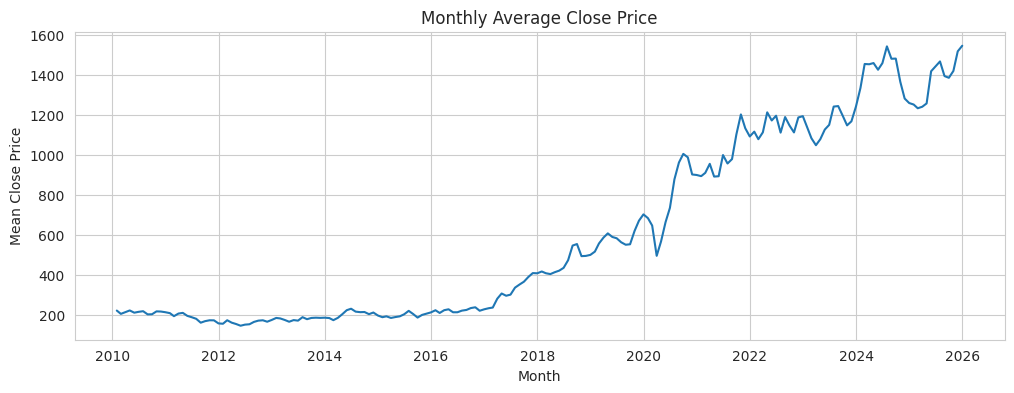

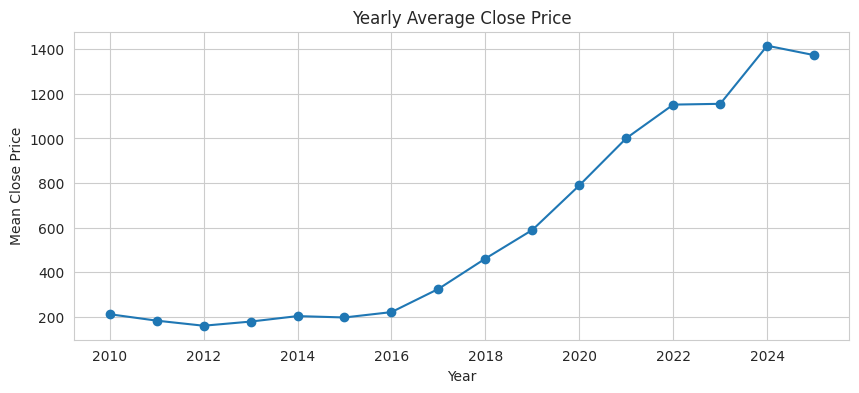

In [17]:
monthly = df['Close'].resample('M').mean()
yearly = df['Close'].resample('Y').mean()

plt.figure(figsize=(12,4))
plt.plot(monthly.index, monthly, label='Monthly Mean Close')
plt.title('Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(yearly.index.year, yearly.values, marker='o')
plt.title('Yearly Average Close Price')
plt.xlabel('Year')
plt.ylabel('Mean Close Price')
plt.show()

## 4) Feature Engineering (MA, returns, price change, target)

In [18]:
# Ensure MAs exist (recompute to be safe)
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['Daily_Returns'] = df['Close'].pct_change()
df['Price_Change'] = df['Close'] - df['Open']
df['Tomorrow_Close'] = df['Close'].shift(-1)
df['Trend'] = (df['Tomorrow_Close'] > df['Close']).astype(int)

# Keep rows only where MA50 exists
df = df[df['MA50'].notna()].copy()
print('After feature creation shape:', df.shape)
df.tail()

After feature creation shape: (3888, 12)


,Open,High,Low,Close,Volume,MA20,MA50,Daily_Returns,Rolling_Vol_30,Price_Change,Tomorrow_Close,Trend
Date,,,,,,,,,,,,
2025-12-05,1540.599976,1545.800049,1520.599976,1530.400024,10183266,1532.515002,1467.264001,-0.003646,0.820030,-10.199951,1539.199951,1
2025-12-08,1543.000000,1551.000000,1535.000000,1539.199951,11301491,1535.579999,1470.422000,0.005750,0.812452,-3.800049,1540.300049,1
2025-12-09,1529.400024,1542.500000,1520.099976,1540.300049,11503971,1537.745001,1473.788000,0.000715,0.776327,10.900024,1534.000000,0
2025-12-10,1536.900024,1547.500000,1531.400024,1534.000000,7991629,1539.195001,1476.836001,-0.004090,0.780584,-2.900024,1536.900024,1
2025-12-11,1545.000000,1550.000000,1524.000000,1536.900024,4705759,1540.290002,1480.032002,0.001890,0.773350,-8.099976,NaN,0


## 5) Train-Test Split & Random Forest Training

In [19]:
features = ["Open","High","Low","Close","Volume","MA20","MA50","Daily_Returns","Price_Change"]
X = df[features]
y = df['Trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8431876606683805

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       382
           1       0.86      0.82      0.84       396

    accuracy                           0.84       778
   macro avg       0.84      0.84      0.84       778
weighted avg       0.84      0.84      0.84       778



## 6) Predict Tomorrow's Trend (using latest available row)

In [23]:
# --- Get the latest available row ---
latest_row = df.iloc[-1]

# --- Prepare input for prediction ---
X_latest = pd.DataFrame([latest_row[features].values], columns=features)

pred = model.predict(X_latest)[0]
proba = model.predict_proba(X_latest)[0]

# Format date in DD-MM-YYYY
formatted_date = df.index[-1].strftime("%d-%m-%Y")

# --- Print results ---
print("📅 Latest Date in Dataset:", formatted_date)
print("----------------------------------------")
print("📌 Today's Market Data")
print(f"Open Price : {latest_row['Open']:.2f}")
print(f"High Price : {latest_row['High']:.2f}")
print(f"Low Price  : {latest_row['Low']:.2f}")
print(f"Close Price: {latest_row['Close']:.2f}")
print(f"Volume     : {int(latest_row['Volume'])}")
print("----------------------------------------")

# Tomorrow prediction
trend_text = "UP 📈" if pred == 1 else "DOWN 📉"
print("🔮 Predicted Trend for Next Day:", trend_text)
print(f"Probability → DOWN: {proba[0]:.2f} | UP: {proba[1]:.2f}")

📅 Latest Date in Dataset: 11-12-2025
----------------------------------------
📌 Today's Market Data
Open Price : 1545.00
High Price : 1550.00
Low Price  : 1524.00
Close Price: 1536.90
Volume     : 4705759
----------------------------------------
🔮 Predicted Trend for Next Day: UP 📈
Probability → DOWN: 0.41 | UP: 0.58


In [27]:
# --- Get the latest available row ---
latest_row = df.iloc[-1]

# --- Prepare input for prediction ---
X_latest = pd.DataFrame([latest_row[features].values], columns=features)

pred = model.predict(X_latest)[0]
proba = model.predict_proba(X_latest)[0]

# Format today's date
today_date = df.index[-1].strftime("%d-%m-%Y")

# Calculate next day's date
next_day_date = (df.index[-1] + pd.Timedelta(days=1)).strftime("%d-%m-%Y")

# --- Print results ---
print("📅 Today's Date:", today_date)
print("----------------------------------------")
print("📌 Today's Market Data")
print(f"Open Price : {latest_row['Open']:.2f}")
print(f"High Price : {latest_row['High']:.2f}")
print(f"Low Price  : {latest_row['Low']:.2f}")
print(f"Close Price: {latest_row['Close']:.2f}")
print(f"Volume     : {int(latest_row['Volume'])}")
print("----------------------------------------")

# Tomorrow prediction (with date)
trend_text = "UP 📈" if pred == 1 else "DOWN 📉"
print(f"🔮 Predicted Trend for Next Day ({next_day_date}): {trend_text}")
print(f"Probability → DOWN: {proba[0]:.2f} | UP: {proba[1]:.2f}")

📅 Today's Date: 11-12-2025
----------------------------------------
📌 Today's Market Data
Open Price : 1545.00
High Price : 1550.00
Low Price  : 1524.00
Close Price: 1536.90
Volume     : 4705759
----------------------------------------
🔮 Predicted Trend for Next Day (12-12-2025): UP 📈
Probability → DOWN: 0.41 | UP: 0.58
